# CAPSTONE PROJECT-2- PRCP-1002-HANDWRITTEN DIGITS

## The Handwritten Digit dataset also referred to as MNIST dataset that contains 70,000 images of handwritten digits  (0-9) that are used for training and testing machine learning models. 

## These digits were collected from various writers, so the images show a variety of handwriting styles. The goal is to classify each image into one of the 10 possible classes (the digits 0-9)

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading Dataset
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


## Inspect the Shape

In [3]:
# Shape of the dataset
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


### The training dataset contain 60,000 images and 28,28 refers to the size of the images that is 28 x 28 pixels. The test data has 10,000 images with the same image size 

## EXPLORATORY DATA ANALYSIS

In [4]:
print("Type of training images:", type(x_train))
print("Type of training images:", type(y_train))
print("Unique labels:", np.unique(y_train))

Type of training images: <class 'numpy.ndarray'>
Type of training images: <class 'numpy.ndarray'>
Unique labels: [0 1 2 3 4 5 6 7 8 9]


### The type of training and testing images is an N-dimensional array, a data structure provided by the Numpy library in python

### Unique labels shows that the dataset contains 10 unique values that is from 0-9

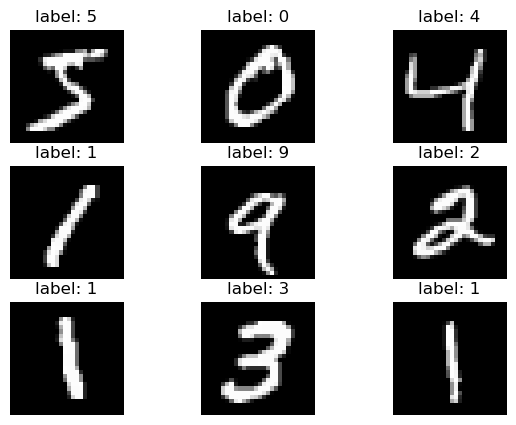

In [5]:
# Plot the first 9 images in the training set
plt.figure(figsize=(7,5)) # Create a figure with a size of 7x5 inches
for i in range(9):  # Loop through the first 9 images
    plt.subplot(3, 3, i+1) # Create a 3x3 grid of subplots, and place the image in the (i+1)th position
    plt.imshow(x_train[i], cmap='gray') # Display the image from the training set (x_train[i] in grayscale
    plt.title(f"label: {y_train[i]}") # Add a title to each subplot with the corresponding label (y_train[i])
    plt.axis('off') # Remove the axis from each subplot for a cleaner look
plt.show() # Display the grid of images

### The image appear as expected

### The labels are paired to the right images

## DATA PREPROCESSING

### Normalize the Image Data

### Before feeding the data to a neural network, we normalize the pixel values 

In [6]:
# Normalize pixel values (from 0–255 to 0–1)
x_train = x_train / 255.0 #we divide by 255.0, we convert all the pixel values to be between 0 and 1.
x_test = x_test / 255.0

### Reshape the Images

In [7]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize again
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [8]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


### To handle the label - One Hot Encoding

In [9]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [10]:
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("First label (one-hot):", y_train[0])

y_train shape: (60000, 10)
y_test shape: (10000, 10)
First label (one-hot): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Data Augmentation

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Make sure x_train has 4D shape: (samples, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)

# Create generator
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Fit the generator on image data only
datagen.fit(x_train)

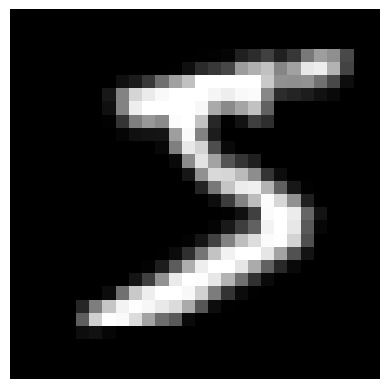

In [12]:
# Generate augmented images from one sample
for batch in datagen.flow(x_train[:1], y_train[:1], batch_size=1):
    import matplotlib.pyplot as plt
    plt.imshow(batch[0].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.show()
    break  # Only show one image

In [13]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## 1. CNN MODEL

## 1. Build the model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential([
    Input(shape=(28, 28, 1)),  
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

## 2. Compile the model

In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 3. Train the model

In [16]:
model.fit(datagen.flow(x_train, y_train, batch_size=32),
          validation_data=(x_test, y_test),
          epochs=10)  

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 33ms/step - accuracy: 0.8368 - loss: 0.4990 - val_accuracy: 0.9870 - val_loss: 0.0383
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9694 - loss: 0.0969 - val_accuracy: 0.9857 - val_loss: 0.0433
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9788 - loss: 0.0683 - val_accuracy: 0.9899 - val_loss: 0.0314
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9825 - loss: 0.0569 - val_accuracy: 0.9912 - val_loss: 0.0259
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 48ms/step - accuracy: 0.9850 - loss: 0.0471 - val_accuracy: 0.9933 - val_loss: 0.0214
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 131s 70ms/step - accuracy: 0.9860 - loss: 0.0451 - val_accuracy: 0.9890 - val_loss: 0.0309
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 129s 69ms/step - accuracy: 0.9871 - loss: 0.0386 - val_accuracy: 0.9927 - val_loss: 0.0232
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 127s 68ms/step - accuracy: 0.988

## 4. Evaluate the model

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)
cnn_score = print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9914 - loss: 0.0258
Test Accuracy: 0.9929999709129333
Test Accuracy: 0.9929999709129333


In [18]:
model.save("my_model.keras")

In [19]:
from tensorflow.keras.models import load_model

model = load_model("my_model.keras")

## 2. SVM MODEL

## 1. Importing libraries for SVM Model

In [20]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score

## 2. Data Preprocessing

### Reshape the images

In [21]:
# Flatten
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

In [22]:
print("x_train_flat shape:", x_train_flat.shape)
print("x_test_flat shape:", x_test_flat.shape)

x_train_flat shape: (60000, 784)
x_test_flat shape: (10000, 784)


###  SVMs work with 1D feature vectors, so we need to flatten the images from (28, 28) to (784,) and scale them.

### Normalize the pixel values by Feature Scaling (Standardization)

In [23]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)

## 3. PCA to reduce dimensions for better performance

In [24]:
# Apply PCA (reduce to 50 dimensions)
pca = PCA(n_components=50)  # Tune this number!
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

## 4. Train the SVM Model

In [25]:
# If y is one-hot encoded, convert it back
if y_train.ndim > 1 and y_train.shape[1] > 1:
    y_train = np.argmax(y_train, axis=1)
    y_test = np.argmax(y_test, axis=1)

# Train SVM (subset for speed)
svm_model = SVC(kernel='rbf')
svm_model.fit(x_train_scaled[:10000], y_train[:10000])

SVC()

## 5. Predict and Evaluate the model

In [26]:
# Predict & evaluate
y_pred = svm_model.predict(x_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
svm_score = print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9389
Accuracy: 0.9389
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.91      0.94      0.93      1032
           3       0.94      0.94      0.94      1010
           4       0.94      0.95      0.94       982
           5       0.95      0.91      0.93       892
           6       0.95      0.95      0.95       958
           7       0.87      0.94      0.90      1028
           8       0.93      0.91      0.92       974
           9       0.95      0.90      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



## 6. Confusion Matrix: Shows that how well your model's predictions match the actual labels. This helps you see where the model is making mistakes.

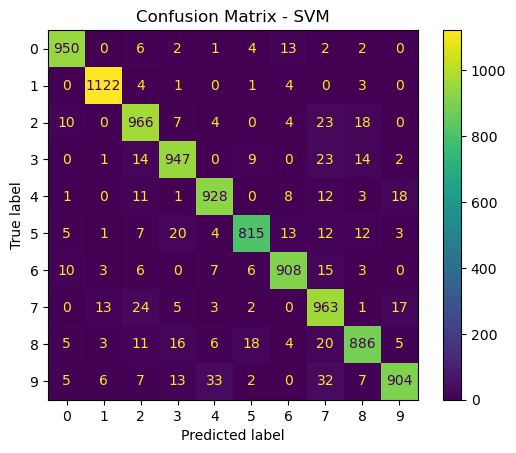

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix - SVM")
plt.show()

### This is a visual Confusion Matrix plot that shows how well the SVM classifier performed on each digit class (0 through 9).



## 7. Visualize Predictions

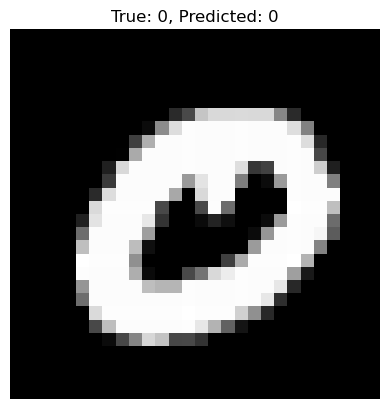

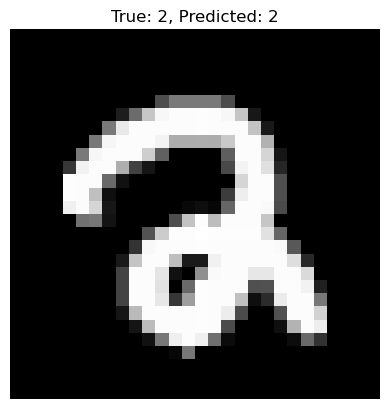

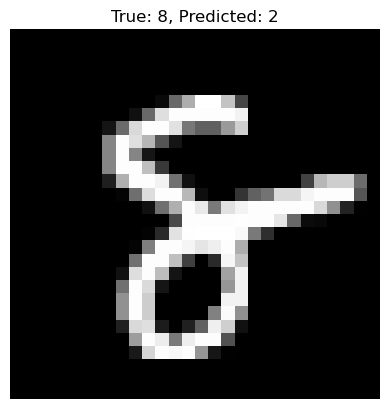

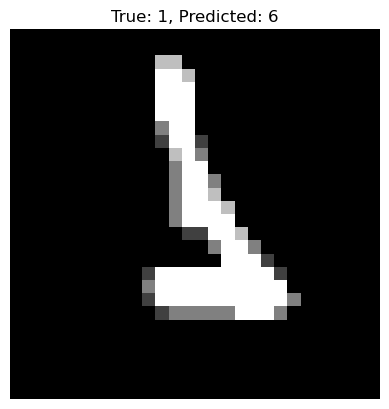

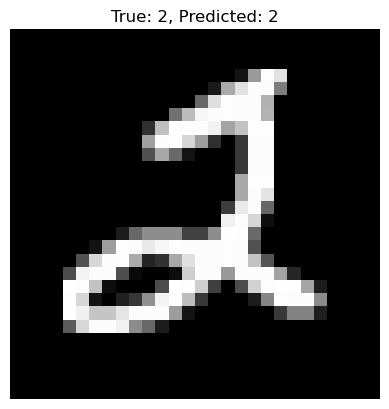

In [28]:
import random

for i in range(5):
    idx = random.randint(0, len(x_test) - 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"True: {y_test[idx]}, Predicted: {y_pred[idx]}")
    plt.axis('off')
    plt.show()

# 3. KNN Model

## 1. Importing Libraries for KNN

In [29]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [30]:
digits = load_digits()
X = digits.data      # Flattened 8x8 images (1797 samples, 64 features)
Y = digits.target    # Labels (digits from 0 to 9)

### The data is already flattened to 1D (64 pixels), so no need to reshape here.

## 2. Visualize Some Digits 

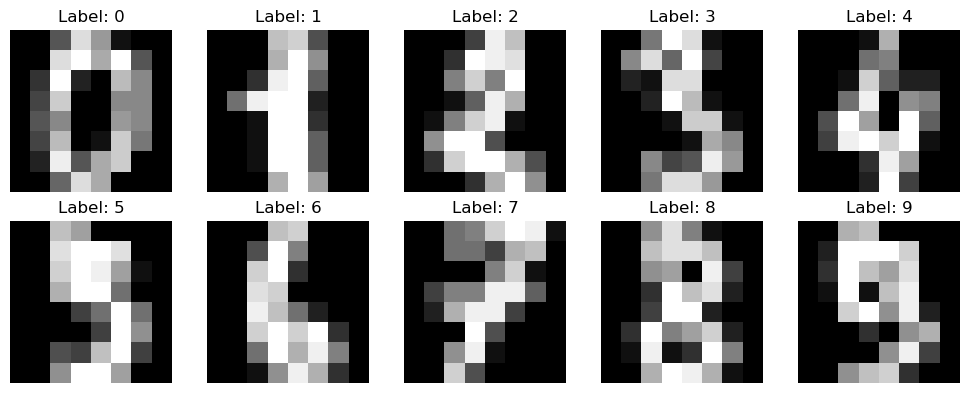

In [31]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## 3. Data Preprocessing

### Feature scaling Standardization

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split into Training and Test Sets

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=42
)

#### After spliting, 
#### X_train: 80% of the data for training
#### X_test: 20% for testing

## 4. Build and Train the KNN Model

In [34]:
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

#### KNN is a lazy learner, meaning it doesn’t "learn" a model — it stores the training data and compares it during prediction.



### Prediction on the Test Set

In [35]:
Y_pred = knn.predict(X_test)

## 5. Evaluate the model

Accuracy: 0.9694444444444444
Accuracy: 0.9694444444444444


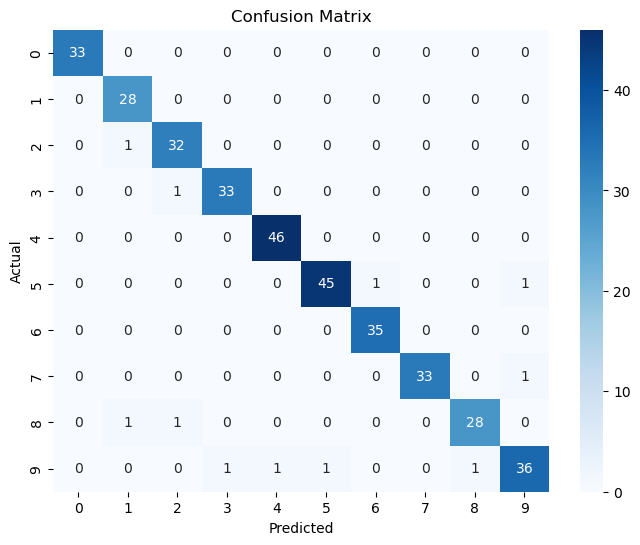

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       0.94      0.97      0.96        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       0.97      0.93      0.95        30
           9       0.95      0.90      0.92        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [36]:
# Accuracy
print("Accuracy:", accuracy_score(Y_test, Y_pred))
knn_score = print("Accuracy:", accuracy_score(Y_test, Y_pred))

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(Y_test, Y_pred))

#### The Accuracy using KNN Model is 0.9694 (overall performance)

#### Confusion matrix shows how well your model's predictions match the actual labels.

#### The classification report has showed the Precision, recall, F1-score (per digit)

## 6. Visualize Predictions

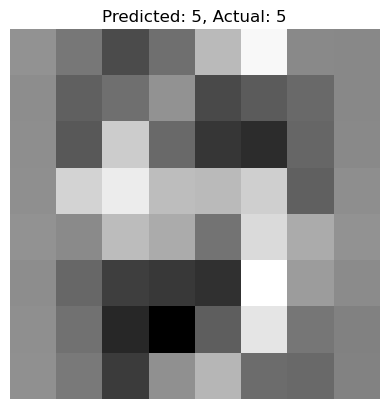

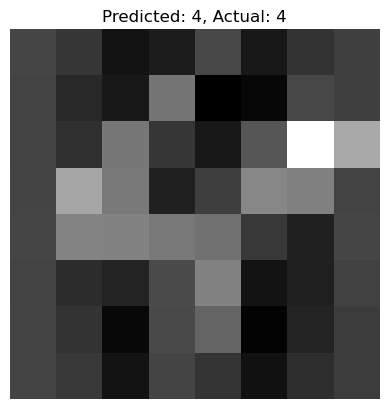

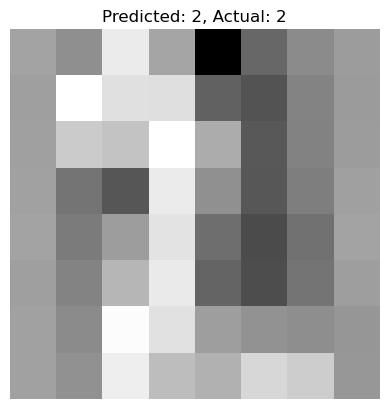

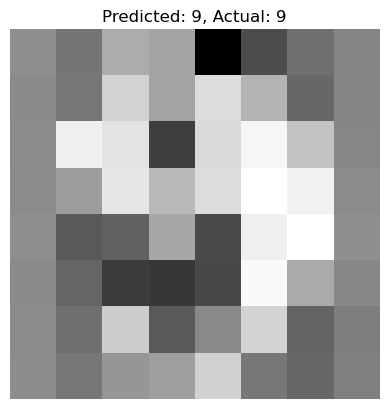

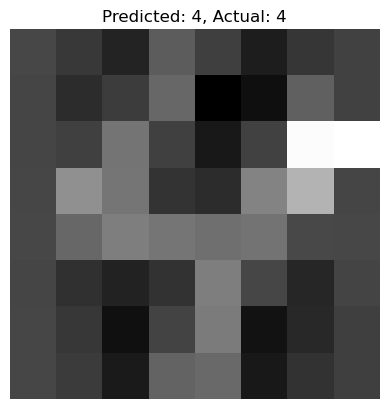

In [37]:
# Show a few test images with predicted and actual labels
import numpy as np

for i in range(5):
    index = np.random.randint(0, len(X_test))
    image = X_test[index].reshape(8, 8)
    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted: {Y_pred[index]}, Actual: {Y_test[index]}")
    plt.axis('off')
    plt.show()

# Compare CNN, SVM, and KNN Accuracies

In [38]:
from sklearn.metrics import accuracy_score

# For CNN
cnn_score = test_acc

# For SVM
svm_score = accuracy_score(y_test, y_pred)

# For KNN
knn_score = accuracy_score(Y_test, Y_pred)

In [39]:
results = {
    "CNN": cnn_score,
    "SVM": svm_score,
    "KNN": knn_score
}

## Model accuracy comparision

In [40]:
print("Model Accuracy Comparison:")
for model, score in results.items():
    print(f"{model} Accuracy: {score:.4f}")


Model Accuracy Comparison:
CNN Accuracy: 0.9930
SVM Accuracy: 0.9389
KNN Accuracy: 0.9694


In [41]:
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
print(results_df)

  Model  Accuracy
0   CNN  0.993000
1   SVM  0.938900
2   KNN  0.969444


# The model that works really good with more accuracy

In [42]:
best_model = max(results, key=results.get)
print(f"\n🏆 Best Performing Model: {best_model} with Accuracy: {results[best_model]:.4f}")


🏆 Best Performing Model: CNN with Accuracy: 0.9930
